In [1]:
# extract files
#file = open("./tiny-imagenet-200/wnids.txt", "r+")
#print (file)

In [2]:
import cv2
from os import listdir
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
from scipy import ndimage, misc

In [3]:
import tensorflow as tf
#import keras
#from keras.models import Sequential
#from keras.layers import Dense, ZeroPadding2D, Conv2D, BatchNormalization, Activation, AveragePooling2D, DepthwiseConv2D, Flatten, Reshape, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization, Activation
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import VGG16
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [4]:
##
# load all images in Training Directory
##
loaded_images = list()
loaded_y = list()
X_test = list()
img_size =64

path ='./tiny-imagenet-200'
clas_folder = path+'/train/'

dict={}
list_clas_folder = listdir(clas_folder)
#list_clas_folder.remove('.DS_Store')

Data Loaded


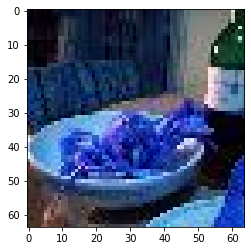

In [5]:
num_classes = len(list_clas_folder)

for i in range(num_classes):
    dict[str(i)] = list_clas_folder[i]
    folder_name = list_clas_folder[i]
    image_path = clas_folder + folder_name + '/images/'
    
    for filename in listdir(image_path):
        img_data = cv2.resize(cv2.imread(image_path + filename), (img_size, img_size),interpolation = cv2.INTER_AREA)
        loaded_images.append(img_data)
        loaded_y.append(i)
print("Data Loaded")
plt.imshow(loaded_images[7])

In [6]:
seq = np.arange(len(loaded_y))
np.random.shuffle(seq)
print("shuffling..")
len(seq)
X_train1 = list()
y_train1 = list()
#loaded_images = loaded_images*(1.0/255)
for i in range(len(seq)):
    X_train1.append(loaded_images[seq[i]])
    y_train1.append(loaded_y[seq[i]])

shuffling..


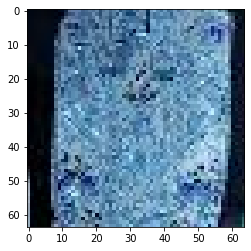

In [7]:
X_train = np.asarray(X_train1)
plt.imshow(X_train[3])


shuffling done...
All data Loaded..


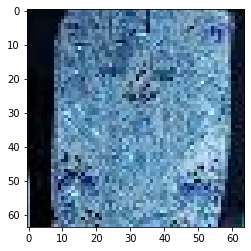

In [8]:
X_train  = X_train*(1/255)
y_train = np.asarray(y_train1)
print("shuffling done...")
print("All data Loaded..")
plt.imshow(X_train[3])

In [9]:
from tensorflow.keras.utils import to_categorical as one_hot
y_train = one_hot(y_train)
print("y_train_shape = " , y_train.shape)
X_val = X_train[-10000:]
y_val = y_train[-10000:]
X_test = X_train[-20000:-10000]
y_test = y_train[-20000:-10000]
X_train = X_train[:-20000]
y_train = y_train[:-20000]
print("X_val_shape = " ,X_val.shape)
print("X_train_shape = " ,X_train.shape)

y_train_shape =  (100000, 200)
X_val_shape =  (10000, 64, 64, 3)
X_train_shape =  (80000, 64, 64, 3)


In [10]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

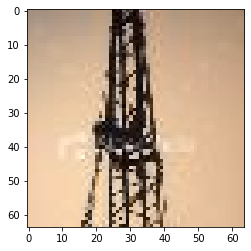

In [11]:
plt.imshow(X_train[7])
datagen.fit(X_train)
plt.imshow(X_train[7])


In [12]:
X_train.shape

(80000, 64, 64, 3)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization, Activation
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import VGG16
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
#from keras.models import Sequential
#from keras.layers import Dense, ZeroPadding2D, Conv2D, BatchNormalization, Activation, AveragePooling2D, DepthwiseConv2D, Flatten, Reshape, GlobalAveragePooling2D
#import keras
print(tf.__version__)

1.13.1


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ZeroPadding2D, Conv2D, BatchNormalization, Activation, AveragePooling2D, DepthwiseConv2D, Flatten, Reshape, GlobalAveragePooling2D
#import keras

model = Sequential()
model.add(ZeroPadding2D(padding=((1,0), (1,0)), input_shape = (64,64,3)))
model.add(Conv2D(32, kernel_size=3, strides=2, padding='valid', input_shape=(225, 225, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(DepthwiseConv2D(depth_multiplier=1, kernel_size=3, strides=1, padding='same', input_shape=(112, 112, 32)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, kernel_size=1, strides=1, padding='same', input_shape=(112, 112, 32)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(ZeroPadding2D(padding=((1,0), (1,0))))
model.add(DepthwiseConv2D(depth_multiplier=1, kernel_size=3, strides=2, padding='valid', input_shape=(113, 113, 64)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size=1, strides=1, padding='same', input_shape=(56, 56, 64)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(DepthwiseConv2D(depth_multiplier=1, kernel_size=3, strides=1, padding='same', input_shape=(56, 56, 128)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size=1, strides=1, padding='same', input_shape=(56, 56, 128)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(ZeroPadding2D(padding=((1,0), (1,0))))

model.add(DepthwiseConv2D(depth_multiplier=1, kernel_size=3, strides=2, padding='valid', input_shape=(57, 57, 128)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, kernel_size=1, strides=1, padding='same', input_shape=(28, 28, 128)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(DepthwiseConv2D(depth_multiplier=1, kernel_size=3, strides=1, padding='same', input_shape=(28, 28, 256)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, kernel_size=1, strides=1, padding='same', input_shape=(28, 28, 256)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(ZeroPadding2D(padding=((1,0), (1,0))))

model.add(DepthwiseConv2D(depth_multiplier=1, kernel_size=3, strides=2, padding='valid', input_shape=(29, 29, 256)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(512, kernel_size=1, strides=1, padding='same', input_shape=(14, 14, 256)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# repeat 1
model.add(DepthwiseConv2D(depth_multiplier=1, kernel_size=3, strides=1, padding='same', input_shape=(None, 14, 14, 512)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, kernel_size=1, strides=1, padding='same', input_shape=(None, 14, 14, 512)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# repeat 2
model.add(DepthwiseConv2D(depth_multiplier=1, kernel_size=3, strides=1, padding='same', input_shape=(None, 14, 14, 512)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, kernel_size=1, strides=1, padding='same', input_shape=(None, 14, 14, 512)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# repeat 3
model.add(DepthwiseConv2D(depth_multiplier=1, kernel_size=3, strides=1, padding='same', input_shape=(None, 14, 14, 512)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, kernel_size=1, strides=1, padding='same', input_shape=(None, 14, 14, 512)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# repeat 4
model.add(DepthwiseConv2D(depth_multiplier=1, kernel_size=3, strides=1, padding='same', input_shape=(None, 14, 14, 512)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, kernel_size=1, strides=1, padding='same', input_shape=(None, 14, 14, 512)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# repeat 5
model.add(DepthwiseConv2D(depth_multiplier=1, kernel_size=3, strides=1, padding='same', input_shape=(None, 14, 14, 512)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, kernel_size=1, strides=1, padding='same', input_shape=(None, 14, 14, 512)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(ZeroPadding2D(padding=((1,0), (1,0))))

model.add(DepthwiseConv2D(depth_multiplier=1, kernel_size=3, strides=2, padding='valid', input_shape=(15, 15, 512)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(1024, kernel_size=1, strides=1, padding='same', input_shape=(7, 7, 512)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(DepthwiseConv2D(depth_multiplier=1, kernel_size=3, strides=1, padding='same', input_shape=(7, 7, 1024)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(1024, kernel_size=1, strides=1, padding='same', input_shape=(7, 7, 1024)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(GlobalAveragePooling2D())

model.add(Dropout(0.1))


#model.add(Flatten())
"""
model.add(Reshape((1,1,1024)))
model.add(Dropout(1e-3))
model.add(Conv2D(200, kernel_size=1, strides=1, padding='same', input_shape=(1, 1, 1024)))
model.add(Reshape([-1,200]))
model.add(Activation('softmax'))
"""

model.add(Dense(200, activation='softmax'))



model = Model(inputs=model.input, outputs =model.output)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_input (InputL (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 65, 65, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 32, 32, 32)        128       
__________

In [22]:
#model = Model(inputs=model.input, outputs =preds)
from tensorflow.keras.optimizers import Adam as Adam

adam = Adam(lr=0.001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
#from tensorflow.keras.utils import multi_gpu_model
#from keras.application import Xception

#par_model = multi_gpu_model(model, gpus = 8)
#par_model.compile(optimizer=adam,
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])

In [24]:
#history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))
model.fit_generator(datagen.flow(X_train, y_train, batch_size=1028),
                    steps_per_epoch=len(X_train) / 1028, epochs=100, validation_data = (X_val, y_val))

Epoch 1/100
78/78 [==============================] - 87s 1s/step - loss: 4.3651 - acc: 0.0908 - val_loss: 11.1919 - val_acc: 0.0241
Epoch 2/100
78/78 [==============================] - 87s 1s/step - loss: 4.1284 - acc: 0.1197 - val_loss: 11.3577 - val_acc: 0.0342
Epoch 3/100
78/78 [==============================] - 87s 1s/step - loss: 3.9643 - acc: 0.1423 - val_loss: 9.0632 - val_acc: 0.0425
Epoch 4/100
78/78 [==============================] - 87s 1s/step - loss: 3.8160 - acc: 0.1639 - val_loss: 7.1443 - val_acc: 0.0545
Epoch 5/100
78/78 [==============================] - 88s 1s/step - loss: 3.6916 - acc: 0.1823 - val_loss: 6.9716 - val_acc: 0.0689
Epoch 6/100
78/78 [==============================] - 88s 1s/step - loss: 3.5727 - acc: 0.2017 - val_loss: 6.6620 - val_acc: 0.0830
Epoch 7/100
78/78 [==============================] - 87s 1s/step - loss: 3.4572 - acc: 0.2186 - val_loss: 6.3408 - val_acc: 0.0835
Epoch 8/100
78/78 [==============================] - 88s 1s/step - loss: 3.3554 -

Epoch 38/100
78/78 [==============================] - 86s 1s/step - loss: 1.1724 - acc: 0.6690 - val_loss: 4.9350 - val_acc: 0.2362
Epoch 39/100
78/78 [==============================] - 86s 1s/step - loss: 1.1109 - acc: 0.6849 - val_loss: 4.9162 - val_acc: 0.2381
Epoch 40/100
78/78 [==============================] - 86s 1s/step - loss: 1.0562 - acc: 0.6991 - val_loss: 4.9912 - val_acc: 0.2443
Epoch 41/100
78/78 [==============================] - 86s 1s/step - loss: 1.0147 - acc: 0.7067 - val_loss: 5.0637 - val_acc: 0.2350
Epoch 42/100
78/78 [==============================] - 87s 1s/step - loss: 0.9619 - acc: 0.7208 - val_loss: 5.1013 - val_acc: 0.2370
Epoch 43/100
78/78 [==============================] - 87s 1s/step - loss: 0.8980 - acc: 0.7390 - val_loss: 5.1406 - val_acc: 0.2315
Epoch 44/100
78/78 [==============================] - 86s 1s/step - loss: 0.8700 - acc: 0.7466 - val_loss: 5.1135 - val_acc: 0.2375
Epoch 45/100
78/78 [==============================] - 86s 1s/step - loss: 0.

Epoch 75/100
78/78 [==============================] - 86s 1s/step - loss: 0.3032 - acc: 0.9071 - val_loss: 6.2064 - val_acc: 0.2385
Epoch 76/100
78/78 [==============================] - 86s 1s/step - loss: 0.2921 - acc: 0.9102 - val_loss: 6.6036 - val_acc: 0.2213
Epoch 77/100
78/78 [==============================] - 86s 1s/step - loss: 0.2947 - acc: 0.9089 - val_loss: 6.1353 - val_acc: 0.2459
Epoch 78/100
78/78 [==============================] - 86s 1s/step - loss: 0.2850 - acc: 0.9122 - val_loss: 6.3044 - val_acc: 0.2403
Epoch 79/100
78/78 [==============================] - 86s 1s/step - loss: 0.2740 - acc: 0.9163 - val_loss: 6.6082 - val_acc: 0.2225
Epoch 80/100
78/78 [==============================] - 85s 1s/step - loss: 0.2777 - acc: 0.9139 - val_loss: 6.5346 - val_acc: 0.2317
Epoch 81/100
78/78 [==============================] - 86s 1s/step - loss: 0.2765 - acc: 0.9146 - val_loss: 7.0431 - val_acc: 0.2025
Epoch 82/100
78/78 [==============================] - 86s 1s/step - loss: 0.

In [25]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)

10000/10000 [==============================] - 4s 401us/sample - loss: 6.9555 - acc: 0.2244


In [26]:
# Save the model
model.save('full_model_with_2244_acc.h5')

In [ ]:
# Recreate the exact same model purely from the file
from keras.models import load_model
#new_model = load_model('path_to_my_model.h5')
classifierLoad = tf.keras.models.load_model('path_to_my_model.h5')

In [ ]:
classifierLoad.summary()